In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import sys, time
module_path = '../../mnist'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
from adaboost.my_get_data import *
import my_naivebayes

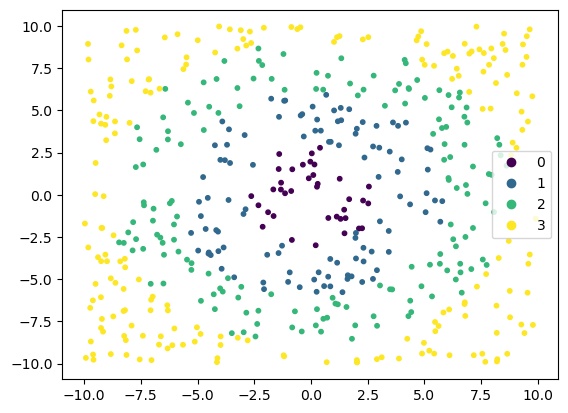

In [2]:
dobj = DataCreater(yfunc2)
x, y = dobj.gen_rand_data(size=500)
sc = plt.scatter(x[:, 0], x[:, 1], c=y, s=10)
plt.legend(*sc.legend_elements())
plt.show()

In [3]:
gnbobj = my_naivebayes.MyGaussianNaiveBayes()
gnbobj.fit(x, y)
gnbobj.score(x, y)

0.642

全集准确率 0.60825


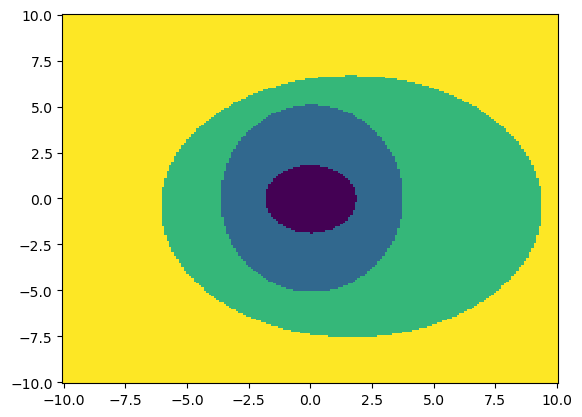

In [4]:
plot_full_region(dobj, gnbobj.predict, show_scatter=False)

全集准确率 0.60825


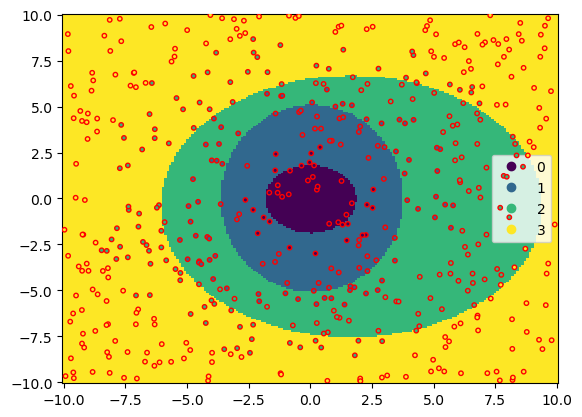

In [5]:
plot_full_region(dobj, gnbobj.predict, x=x, y_true=y, show_scatter=True)

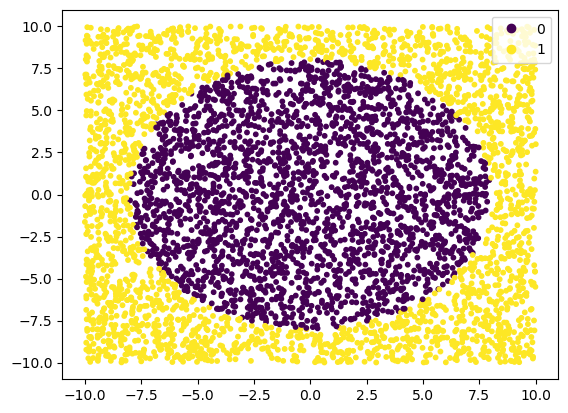

In [6]:
dobj = DataCreater(yfunc1)
x, y = dobj.gen_rand_data(size=5000)
sc = plt.scatter(x[:, 0], x[:, 1], c=y, s=10)
plt.legend(*sc.legend_elements())
plt.show()

In [7]:
gnbobj = my_naivebayes.MyGaussianNaiveBayes()
gnbobj.fit(x, y)
gnbobj.score(x, y)

0.9348

全集准确率 0.9347


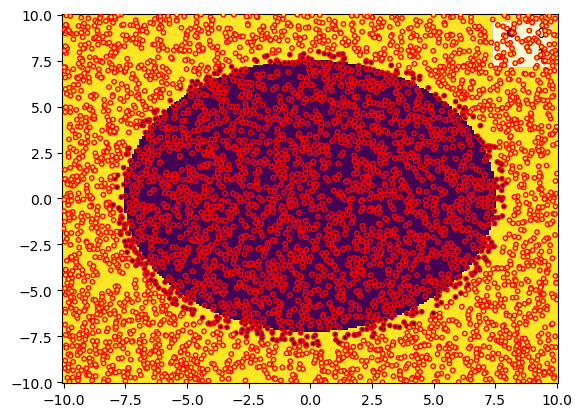

In [8]:
plot_full_region(dobj, gnbobj.predict, x=x, y_true=y, show_scatter=True)

In [9]:
from sklearn.model_selection import train_test_split
d = np.loadtxt("../../datasets/mushroom/agaricus-lepiota.data", dtype=object, delimiter=',')
x, y = d[:, 1:], d[:, 0]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)
for e in train_x, test_x, train_y, test_y:
    print(e.shape)

(5686, 22)
(2438, 22)
(5686,)
(2438,)


In [10]:
for mod in my_naivebayes.MyNaiveBayes1, my_naivebayes.MyNaiveBayes2:
    obj = mod(alpha=1e-10)
    obj.fit(train_x, train_y)
    print(f"{mod.__name__} TRAIN_SCORE {obj.score(train_x, train_y)}")
    print(f"{mod.__name__} TEST_SCORE {obj.score(test_x, test_y)}")

MyNaiveBayes1 TRAIN_SCORE 0.9973619416109744
MyNaiveBayes1 TEST_SCORE 0.9967186218211649
MyNaiveBayes2 TRAIN_SCORE 0.9973619416109744
MyNaiveBayes2 TEST_SCORE 0.9967186218211649


### MyBernoulliNaiveBayes测试 MNIST数据集

In [11]:
data_file = '../../mnist/_data/sklearnstyle_mnist_data.npz'
train_x, test_x, train_y, test_y = np.load(data_file).values()

tic = time.time()
bobj = my_naivebayes.MyBernoulliNaiveBayes(alpha=1e-10, threshold=0.5)
bobj.fit(train_x, train_y)
print("TRAIN_ACC", bobj.score(train_x, train_y))
print("TEST_ACC", bobj.score(test_x, test_y))
print("运行时间", time.time() - tic)

TRAIN_ACC 0.83295
TEST_ACC 0.8419
运行时间 2.77713680267334


### MyNaiveBayes1 MyNaiveBayes2测试 MNIST数据集

In [12]:
from sklearn.feature_selection import VarianceThreshold
train_xbin = (train_x > 0.5).astype(np.float64)
test_xbin = (test_x > 0.5).astype(np.float64)
filter_obj = VarianceThreshold()
filter_obj.fit(train_xbin)
train_xbin = filter_obj.transform(train_xbin)
test_xbin  = filter_obj.transform(test_xbin)

tic = time.time()
bobj = my_naivebayes.MyNaiveBayes1(alpha=1e-10)
bobj.fit(train_xbin, train_y)
print("MyNaiveBayes1 TRAIN_ACC", bobj.score(train_xbin, train_y))
print("MyNaiveBayes1 TEST_ACC", bobj.score(test_xbin, test_y))
print("运行时间", time.time() - tic)

tic = time.time()
bobj = my_naivebayes.MyNaiveBayes2(alpha=1e-10)
bobj.fit(train_xbin, train_y)
print("MyNaiveBayes2 TRAIN_ACC", bobj.score(train_xbin, train_y))
print("MyNaiveBayes2 TEST_ACC", bobj.score(test_xbin, test_y))
print("运行时间", time.time() - tic)

MyNaiveBayes1 TRAIN_ACC 0.8381833333333333
MyNaiveBayes1 TEST_ACC 0.8439
运行时间 97.01673936843872
MyNaiveBayes2 TRAIN_ACC 0.8381833333333333
MyNaiveBayes2 TEST_ACC 0.8439
运行时间 8.64524507522583
